findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Arial, sans-serif


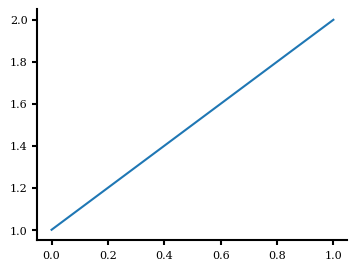

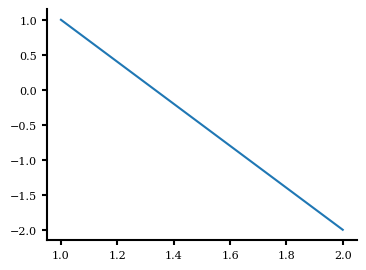

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    plt.plot([0.0, 1.0], [1.0, 2.0])
    plt.savefig("../svg/panel_a.svg")
    
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    plt.plot([1.0, 2.0], [1.0, -2.0])
    plt.savefig("../svg/panel_b.svg")

In [2]:
import time
import IPython.display as IPd

def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

In [16]:
from svgutils.compose import *

# > Inkscape pixel is 1/90 of an inch, other software usually uses 1/72.
# > http://www.inkscapeforum.com/viewtopic.php?f=6&t=5964
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '12pt', 'font': 'Arial', 'weight': '800'}

f = Figure("20.3cm", "7.1cm",
           
    Panel(
          SVG("../svg/panel_a.svg").scale(svg_scale),
          Text("a", -5, 2.0, **kwargs_text),
    ).move(10, 20),
    
    Panel(
          SVG("../svg/panel_b.svg").scale(svg_scale),
          Text("b", -5, 2.0, **kwargs_text),
    ).move(400, 20),
)

!mkdir -p fig
f.save("../fig/fig.svg")
svg("../fig/fig.svg")